In [11]:
from pymatsolver import Mumps
import SimPEG.electromagnetics.time_domain as tdem
import discretize
import numpy as np

In [104]:
hx = [(16, 20.), (32, 10.), (16, 20.0)]
hy = hx
hz = [(16, 20.), (32, 10.), (16, 20.0)]
mesh = discretize.TensorMesh([hx, hy, hz], origin='CCC')
mesh

TensorMesh: 125,000 cells

                      MESH EXTENT             CELL WIDTH      FACTOR
  dir    nC        min           max         min       max      max
  ---   ---  ---------------------------  ------------------  ------
   x     50       -480.00        480.00     16.00     32.00    2.00
   y     50       -480.00        480.00     16.00     32.00    2.00
   z     50       -480.00        480.00     16.00     32.00    2.00

In [105]:
mesh.nodes_x

array([-480., -464., -448., -432., -416., -400., -384., -368., -352.,
       -336., -320., -304., -288., -272., -256., -240., -224., -208.,
       -192., -176., -160., -128.,  -96.,  -64.,  -32.,    0.,   32.,
         64.,   96.,  128.,  160.,  176.,  192.,  208.,  224.,  240.,
        256.,  272.,  288.,  304.,  320.,  336.,  352.,  368.,  384.,
        400.,  416.,  432.,  448.,  464.,  480.])

In [106]:
waveform = tdem.sources.StepOffWaveform()

current_path = np.array([
    [-128, -128, 0],
    [-128, 128, 0],
    [128, 128, 0],
    [128, -128, 0],
    [-128, -128, 0],
])

source = tdem.sources.LineCurrent(location=current_path, waveform=waveform)

survey = tdem.Survey(source)

time_steps = [(1E-6, 10), (1E-5, 10), (1E-4, 10)]

In [124]:
conductivity = np.full(mesh.n_cells, 1E-8)
conductivity[mesh.cell_centers[:, -1]<0] = 1E-2

In [125]:
conductivity

array([1.e-02, 1.e-02, 1.e-02, ..., 1.e-08, 1.e-08, 1.e-08])

In [126]:
solver_opts = {
    'is_symmetric':True,
    'is_positive_definite':True,
}
sim = tdem.simulation.Simulation3DElectricField(
    mesh, survey=survey, time_steps=time_steps, sigma=conductivity,
    solver=Mumps, solver_opts=solver_opts
)

In [127]:
fields = sim.fields(None)

In [128]:
E_field = fields[source, 'e']

In [129]:
J_field = fields[source, 'j']

In [130]:
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt

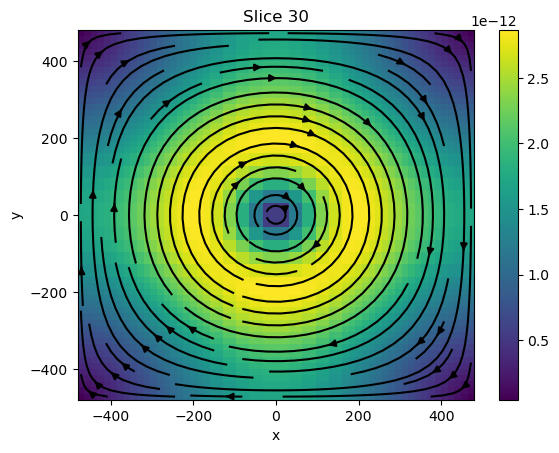

0.0001


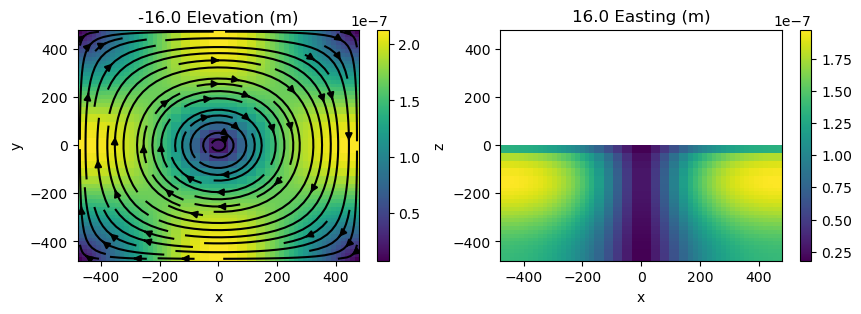

In [189]:
ind = 25
z_slice=24
x_slice=25

plt.figure(figsize=(10, 3))
ax = plt.subplot(1,2,1)

im, stream = mesh.plot_slice(
    J_field[:, ind], v_type='E', view='vec', normal='z', ind=z_slice, ax=ax
)
plt.colorbar(im)
ax.set_title(f'{mesh.cell_centers_z[z_slice]} Elevation (m)')


ax = plt.subplot(1,2,2)
dens = np.sqrt(mesh.average_edge_to_cell @ (J_field[:, ind]**2))
dens[mesh.cell_centers[:, -1]>0] = np.nan

im, = mesh.plot_slice(dens, normal='y', ind=x_slice, ax=ax)
plt.colorbar(im)

ax.set_title(f'{mesh.cell_centers_x[x_slice]} Easting (m)')
print(sim.time_steps[ind])

##### 

# 